# Generalisation, underfitting and overfitting

**NOTES**
- Usually collecting more data points yields more variety, and therefore allows for more complex models
- For the KNeighbours algorithm, using n=1 results in a more complex model, while using a higher value for n will create a more smooth line, and therefore a less complex model



## Sample dataset


X.shape is (26, 2)


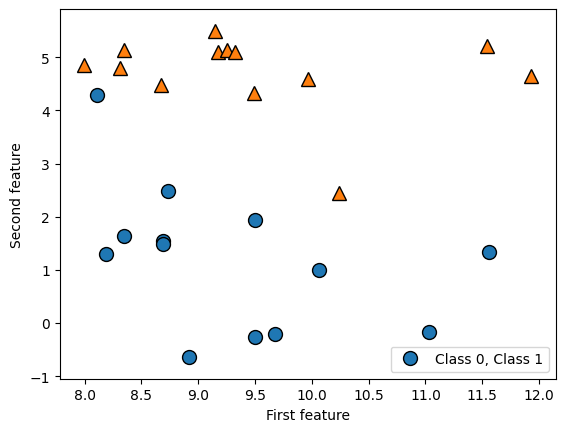

In [15]:
import mglearn
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer #dataset used in the examples

# Generate dataset
X, y = mglearn.datasets.make_forge()


# Plot dataset
mglearn.discrete_scatter(X[:, 0], X[:,1], y)
plt.legend(["Class 0, Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print(f"X.shape is {X.shape}")



In [12]:
# inspecting the 'breast cancer DS' we will use

#loads DS
cancer = load_breast_cancer()
print(f"DATASET CANCER keys {cancer.keys()}")


# gets DS data shape
print(f"The shape of cancer data: {cancer.data.shape}")

# Checks how many malignant and benign points
print("Sample counts per class:\n{}".format(
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))


# Checks features names
print(f"Features names\n {cancer.feature_names}")

DATASET CANCER keys dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
The shape of cancer data: (569, 30)
Sample counts per class:
{'malignant': 212, 'benign': 357}
Features names
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


## 2.1 Analysing KNeighbours Classifier

In [19]:
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)
print(f"The accuracy score is {knn.score(X_test, y_test):.2f}")

The accuracy score is 0.86


For two-dimension datasets, we can plot graphs to help visualise the 'decision boundary', which is the divide the algorithm uses

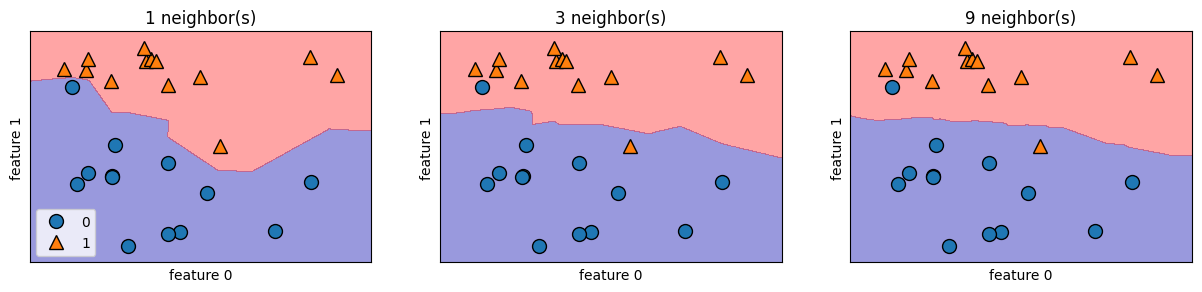

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

for n_neighbors, ax in zip([1,3, 9], axes):
    # the fit method returns the object self, so we can instantiate and fit in one line
    knn = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(knn, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)